In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import streamlit as st

# Data Loading
The database (Excel file) is loaded. In this case, only the sheet containing data from 2009 to 2010 is loaded.

In [4]:
Online_retail = pd.read_excel('Dataset/online_retail_II.xlsx', sheet_name='Year 2009-2010')
Online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


A copy of the original dataset is created as a backup in case of any erroneous modifications.

In [3]:
data = Online_retail.copy()

In [4]:
# Display dataset information (observations, variables, data types, etc.)
Online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# Display statistical summary of the dataset
Online_retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


# Data Preparation
## Remove Unnecessary Columns

Based on the established objectives, almost all features are required to obtain both the desired graphs and new variables (e.g., number of sales). However, the only variables that are not necessary for the analysis are *Description* and *Invoice*, so the decision is made to remove them.

In [6]:
# Remove the 'Description' and 'Invoice' columns
Online_retail.drop(['Description', 'Invoice'], axis=1, inplace=True)
Online_retail.head()

,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
Online_retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


## Remove Duplicates

Duplicates may or may not be removed, depending on the type of problem being addressed. In this case, where the dataset consists of sales transaction records, a duplicate entry would mean that the same transaction was made for the same customer, which is hard to believe since these invoices include the date and time of the sale. Therefore, the decision is made to remove these duplicate records.

In [8]:
# Count duplicates in the dataset
Online_retail.duplicated().sum()

7091

In [9]:
# Remove duplicates
Online_retail.drop_duplicates(inplace=True)

In [10]:
# Review the information again to see the count after removing duplicates
Online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518370 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    518370 non-null  object        
 1   Quantity     518370 non-null  int64         
 2   InvoiceDate  518370 non-null  datetime64[ns]
 3   Price        518370 non-null  float64       
 4   Customer ID  410750 non-null  float64       
 5   Country      518370 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 27.7+ MB


In [11]:
# At this point, a negative value is observed in the minimum of 'Price'.
Online_retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,518370.000000,518370,518370.000000,410750.000000
mean,10.448585,2010-06-28 06:25:28.365762048,4.714850,15353.638103
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 11:07:00,1.250000,13979.000000
50%,3.000000,2010-07-05 15:21:30,2.100000,15311.000000
75%,10.000000,2010-10-15 11:40:00,4.210000,16797.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,108.110799,NaN,147.122436,1681.665905


## Remove Rows with Missing Values (Customer ID)

Upon reviewing the dataset information, it is observed that the *Customer ID* variable has fewer values than the rest of the features, indicating a certain number of missing values in the total observations. Although there are different techniques for data imputation to fill these values, in this case, the decision is made to remove all rows (observations) where any of their columns have missing values. This is because the nature of the Customer ID variable is not data that follows a trend (as it is a code to identify a customer), so it would not be possible to assume what the missing values should be.

In [12]:
# Remove all null data
Online_retail.dropna(inplace=True)

In [13]:
# Review the dataset information again to observe the changes.
Online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410750 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    410750 non-null  object        
 1   Quantity     410750 non-null  int64         
 2   InvoiceDate  410750 non-null  datetime64[ns]
 3   Price        410750 non-null  float64       
 4   Customer ID  410750 non-null  float64       
 5   Country      410750 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 21.9+ MB


In [14]:
# After removing missing values, 'Price' no longer has a negative minimum value.
Online_retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,410750.000000,410750,410750.000000,410750.000000
mean,12.923581,2010-06-30 19:56:27.838685952,3.908423,15353.638103
min,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 09:46:00,1.250000,13979.000000
50%,5.000000,2010-07-08 15:21:30,1.950000,15311.000000
75%,12.000000,2010-10-14 12:32:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,102.041048,NaN,71.715927,1681.665905


# Analysis of Outliers and Invalid Data

Just as a dataset can have duplicate or missing data, it is also possible to encounter data that is out of the ordinary (outliers) for certain variables or even data that takes values that, depending on the type of variable analyzed in a given context, should not be possible (invalid). To address this, a review is conducted by establishing certain criteria to determine a threshold where such data can be considered outliers and/or invalid.

In [15]:
# Use .describe() to observe the statistical information of each variable, to know the range of values, minimum, maximum, average, etc.
Online_retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,410750.000000,410750,410750.000000,410750.000000
mean,12.923581,2010-06-30 19:56:27.838685952,3.908423,15353.638103
min,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 09:46:00,1.250000,13979.000000
50%,5.000000,2010-07-08 15:21:30,1.950000,15311.000000
75%,12.000000,2010-10-14 12:32:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,102.041048,NaN,71.715927,1681.665905


Upon observing the statistical information of the dataset, it is decided to consider only the 'Quantity' and 'Price' features, as they are the only variables with quantitative information. 'InvoiceDate' is a temporal variable, and 'Customer ID' is not linear since its values are codes assigned to customers; therefore, it would be more appropriate to treat it as a categorical variable.

To complement the analysis, visualizing the data distribution using a boxplot is useful.

<function matplotlib.pyplot.show(close=None, block=None)>

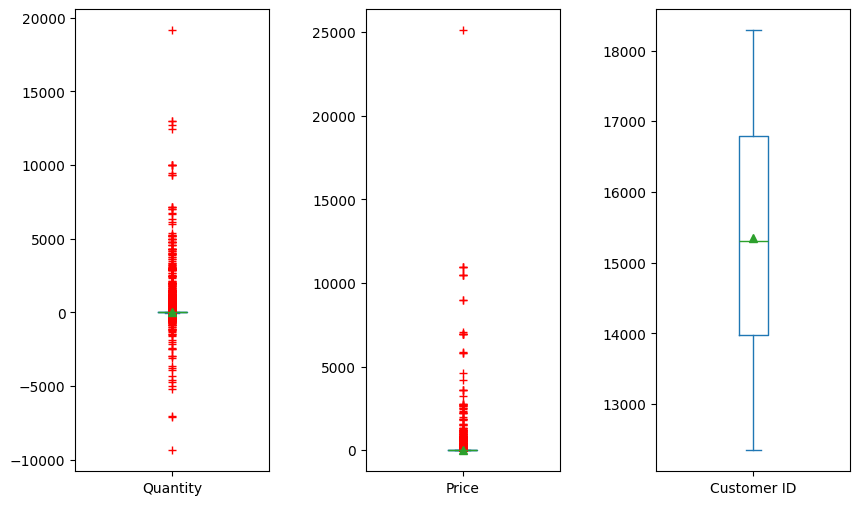

In [16]:
Online_retail.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10,6),
    showmeans=True,
    flierprops=dict(markeredgecolor='r',marker='+'),
)

plt.subplots_adjust(wspace=0.5)
plt.show

Thus, when observing the values of 'Quantity' and 'Price', we have:

**Outliers:** Reviewing the average value for each variable and comparing it with the maximum value, a large difference can be observed between common quantities and unit prices versus the highest ones, to the point that, in the boxplot, it seems that all values are outliers. However, since we are dealing with many transactions of various products, it can be normal to have so many variations in the quantities purchased as in the unit prices. Furthermore, upon reading the dataset description, it is clarified that a large portion of the buyers are wholesalers, which could justify the large number of quantities purchased in a single transaction, and that there are products (which might have few sales) with a very high unit price. Based on the above, the decision is made *not to remove outliers.*

**Invalid Data:** In both the boxplot and the statistical information, negative values can be seen for the 'Quantity' variable. A priori, these values lack meaning because if we are dealing with transactions, it should not be possible to see a customer buying a negative quantity of products. If viewed from another perspective, these negative values could be considered as "returned quantities," and in that case, they could be valid data. In this case, all negative values will be considered erroneous data, so the decision is made to *remove invalid data.*

In [17]:
# Keep only the values where the quantity is positive.
Online_retail = Online_retail[(Online_retail['Quantity'] >= 0)]

In [18]:
Online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400934 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    400934 non-null  object        
 1   Quantity     400934 non-null  int64         
 2   InvoiceDate  400934 non-null  datetime64[ns]
 3   Price        400934 non-null  float64       
 4   Customer ID  400934 non-null  float64       
 5   Country      400934 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 21.4+ MB


In [19]:
Online_retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,400934.000000,400934,400934.000000,400934.000000
mean,13.768393,2010-07-01 04:56:25.819810560,3.305617,15361.471536
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 13:13:00,1.250000,13985.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000
75%,12.000000,2010-10-14 14:07:00,3.750000,16805.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,97.641275,NaN,35.046942,1680.677823


<function matplotlib.pyplot.show(close=None, block=None)>

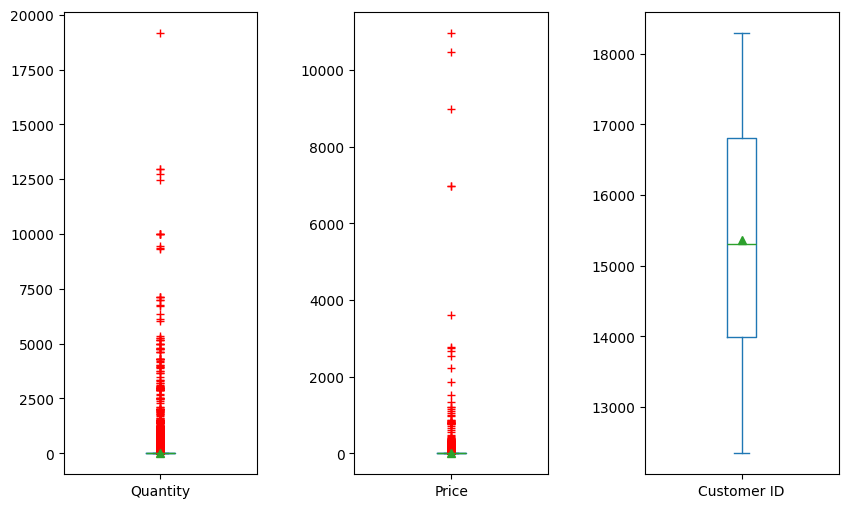

In [20]:
Online_retail.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10,6),
    showmeans=True,
    flierprops=dict(markeredgecolor='r',marker='+'),
)

plt.subplots_adjust(wspace=0.5)
plt.show

# Data Transformation

- CustomerID: Num. --> Categ.
- Sales: Quantity*Price

Since CustomerID is a number used to identify a customer, it should not be considered or treated as a numerical variable because it does not represent any quantifiable characteristic or follow a trend. Therefore, it is decided to convert it to a categorical type, changing it from numeric to string.

In [21]:
Online_retail['Customer ID'] = Online_retail['Customer ID'].astype(str)

C:\Users\jhonn\AppData\Local\Temp\ipykernel_12084\3121957022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Online_retail['Customer ID'] = Online_retail['Customer ID'].astype(str)


For each transaction, the quantity of products sold and the unit price of that product are presented. From this, it is possible to derive the sales value (hereinafter referred to as 'Sales'). For example, if 50 units of a product costing $1000 COP are purchased, then the sales value would be $50000 COP.

For this, a new column will be created that results from the product of the 'Quantity' column and the 'Price' column.

In [22]:
Online_retail['Sales'] = Online_retail['Quantity']*Online_retail['Price']

C:\Users\jhonn\AppData\Local\Temp\ipykernel_12084\1927939582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Online_retail['Sales'] = Online_retail['Quantity']*Online_retail['Price']


However, for the purposes of the analysis, it is decided to use the cumulative sales value based on the respective stock code. This is to obtain the total sales of each product in the entire database, so an additional column called 'Sales_SC' (Sales_StockCode) will be created.

In [23]:
Online_retail['Sales_SC'] = Online_retail.groupby('StockCode')['Sales'].cumsum()

C:\Users\jhonn\AppData\Local\Temp\ipykernel_12084\120058104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Online_retail['Sales_SC'] = Online_retail.groupby('StockCode')['Sales'].cumsum()


In [24]:
Online_retail.head()

,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Sales_SC
0,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4
1,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0
2,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0
3,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,100.8
4,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0


In [25]:
Online_retail.describe()

,Quantity,InvoiceDate,Price,Sales,Sales_SC
count,400934.000000,400934,400934.000000,400934.000000,400934.000000
mean,13.768393,2010-07-01 04:56:25.819810560,3.305617,21.943947,5151.159930
min,1.000000,2009-12-01 07:45:00,0.000000,0.000000,0.001000
25%,2.000000,2010-03-26 13:13:00,1.250000,5.000000,586.500000
50%,5.000000,2010-07-09 10:26:00,1.950000,12.500000,1909.075000
75%,12.000000,2010-10-14 14:07:00,3.750000,19.500000,5377.230000
max,19152.000000,2010-12-09 20:01:00,10953.500000,15818.400000,151339.160000
std,97.641275,NaN,35.046942,77.756535,11273.100662


In [26]:
Online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400934 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    400934 non-null  object        
 1   Quantity     400934 non-null  int64         
 2   InvoiceDate  400934 non-null  datetime64[ns]
 3   Price        400934 non-null  float64       
 4   Customer ID  400934 non-null  object        
 5   Country      400934 non-null  object        
 6   Sales        400934 non-null  float64       
 7   Sales_SC     400934 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 27.5+ MB


# Objective Resolution
## Sales vs. Country Graph

With this graph, the aim is to observe the sales trend for each country, determining not the countries where more transactions are made, but the countries where a higher sales value is obtained.

The first graph shows the countries with the highest sales value, where it is observed that, by a wide margin, the country with the highest sales value is the United Kingdom. This is likely because it is the country where the largest number of transactions are made, so, both by accumulation and by the probability that they also purchase the most expensive products, they have the highest sales value. Because this wide difference affects the visualization of the graph for observing the other countries, it is decided to show a second graph where the United Kingdom is omitted, allowing for a better observation and comparison of the rest of the countries.

Text(0.5, 1.0, 'Countries vs. Sales - Total (without UK)')

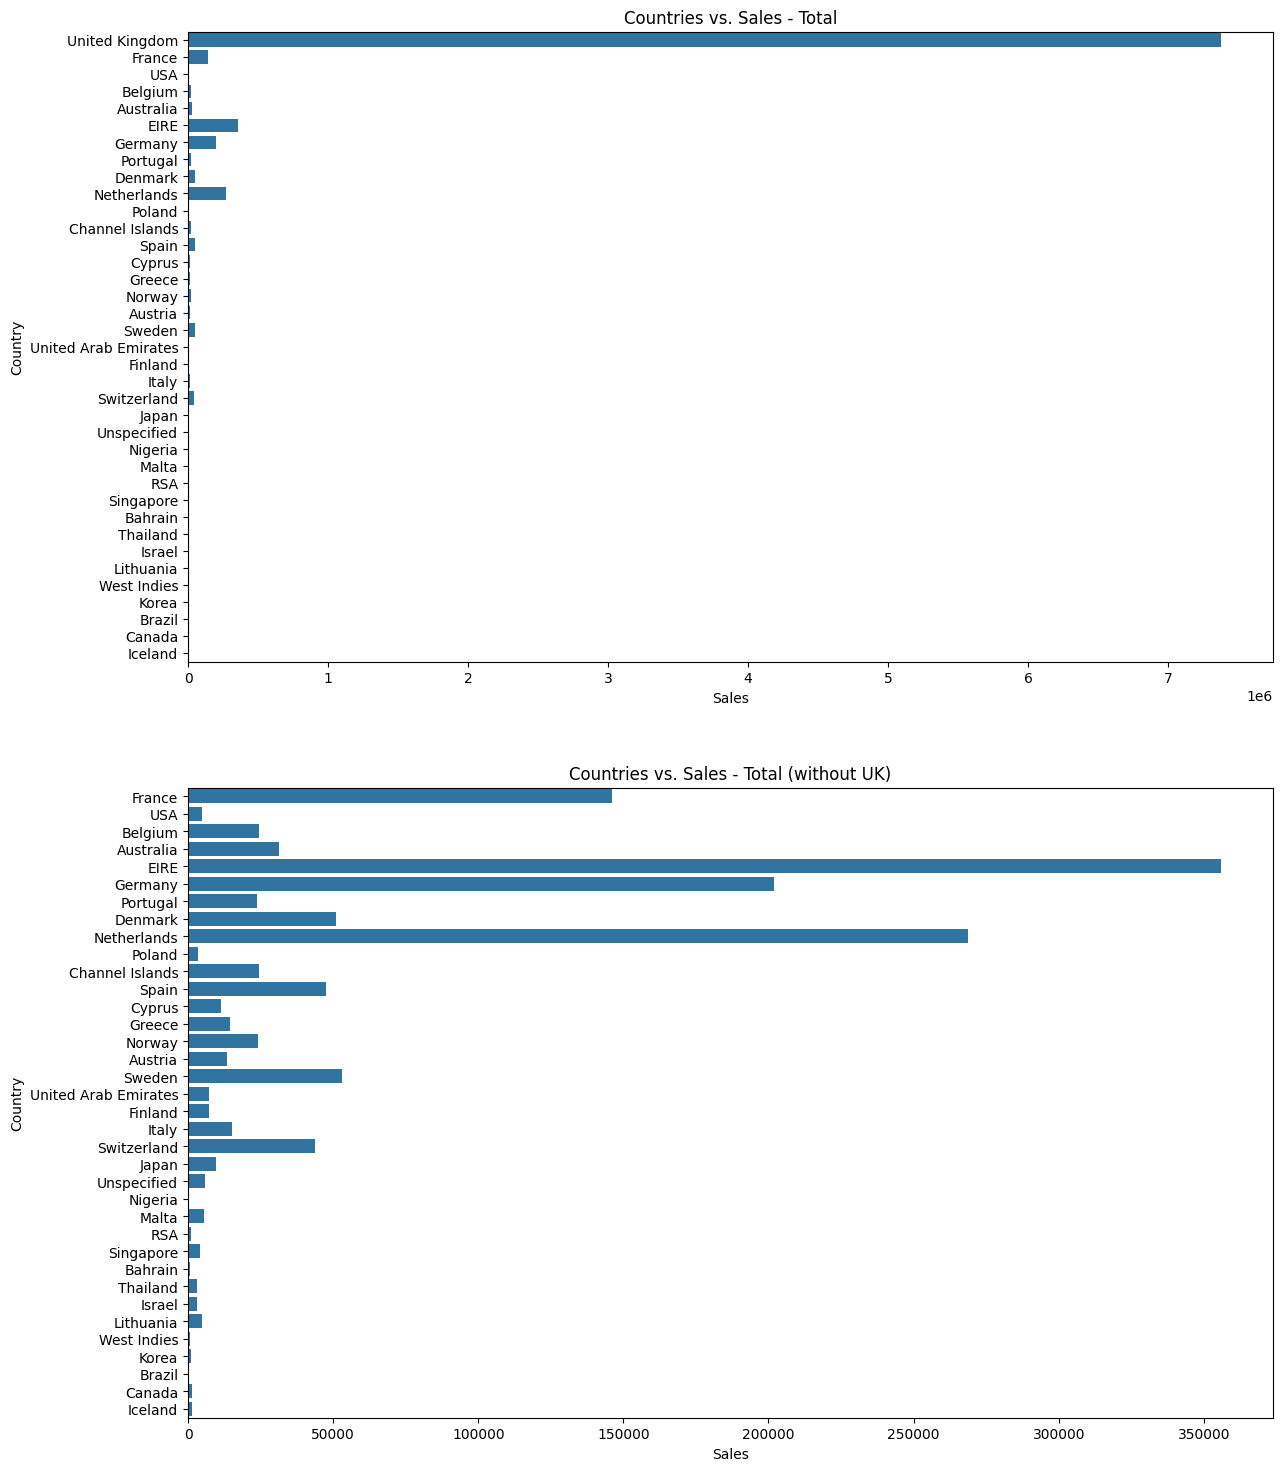

In [27]:
plt.figure(figsize=(14, 18))

plt.subplot(2, 1, 1)

sn.barplot(
    x="Sales", 
    y="Country", 
    data=Online_retail, 
    estimator=sum, 
    errorbar=None
)
plt.title('Countries vs. Sales - Total')

plt.subplot(2, 1, 2)

sn.barplot(
    x="Sales", 
    y="Country", 
    data=Online_retail[Online_retail['Country'] != 'United Kingdom'], 
    estimator=sum, 
    errorbar=None, 
)
plt.title('Countries vs. Sales - Total (without UK)')

Now, the same graphs are made but with the cumulative sales value by StockCode, observing that there are noticeable changes, showing which ones have a higher cumulative sales value for each product, that is, which has generated a higher sales value for the same product, which could allow us to know which is the best-selling product in a given country.

Text(0.5, 1.0, 'Countries vs. Sales - Cumulative by StockCode (without UK)')

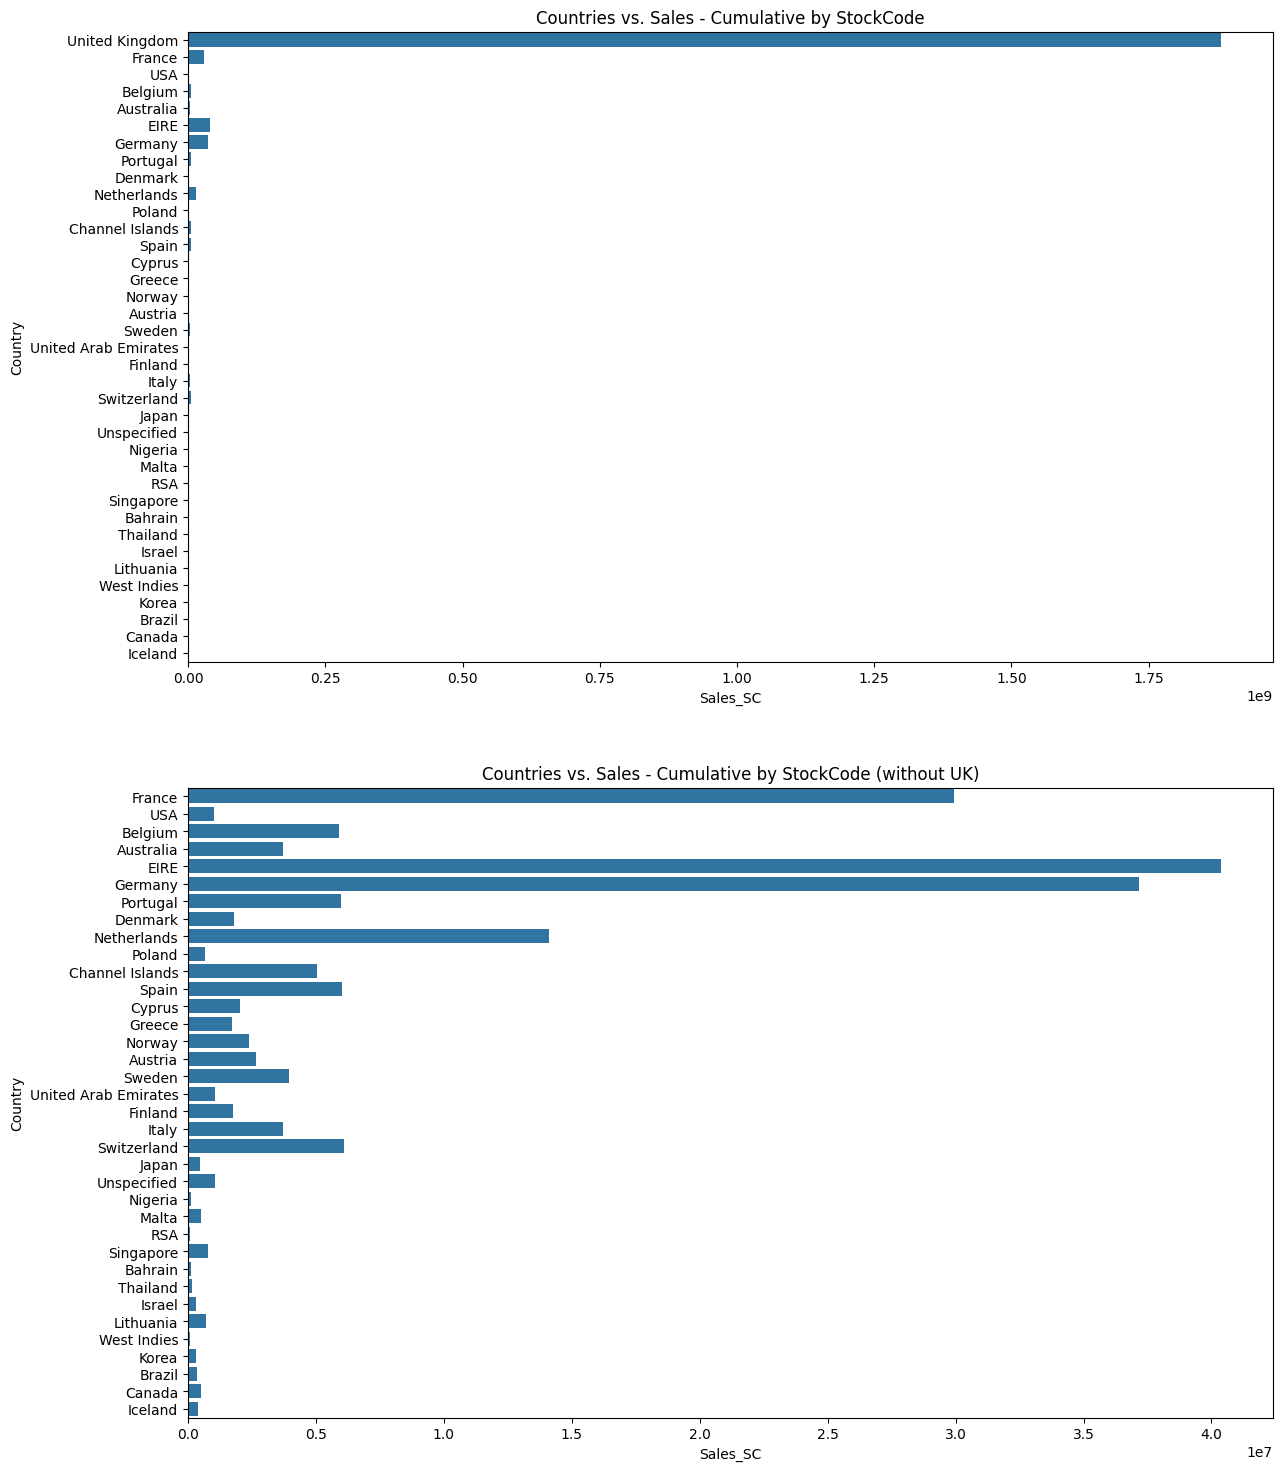

In [28]:
plt.figure(figsize=(14, 18))

plt.subplot(2, 1, 1)

sn.barplot(
    x="Sales_SC", 
    y="Country", 
    data=Online_retail, 
    estimator=sum, 
    errorbar=None
)
plt.title('Countries vs. Sales - Cumulative by StockCode')

plt.subplot(2, 1, 2)

sn.barplot(
    x="Sales_SC", 
    y="Country", 
    data=Online_retail[Online_retail['Country'] != 'United Kingdom'], 
    estimator=sum, 
    errorbar=None, 
)
plt.title('Countries vs. Sales - Cumulative by StockCode (without UK)')

Finally, we want to see which country, on average, generates a higher sales value. This is to make the comparison fairer, as the analysis could be biased by only considering the total, since this varies depending on the number of buyers per country, which in turn depends on its population. In this case, it can be observed that the United Kingdom is no longer in the lead, likely because, although it generates the highest sales value, it is also the country with the largest number of buyers.

Text(0.5, 1.0, 'Countries vs. Sales - Average')

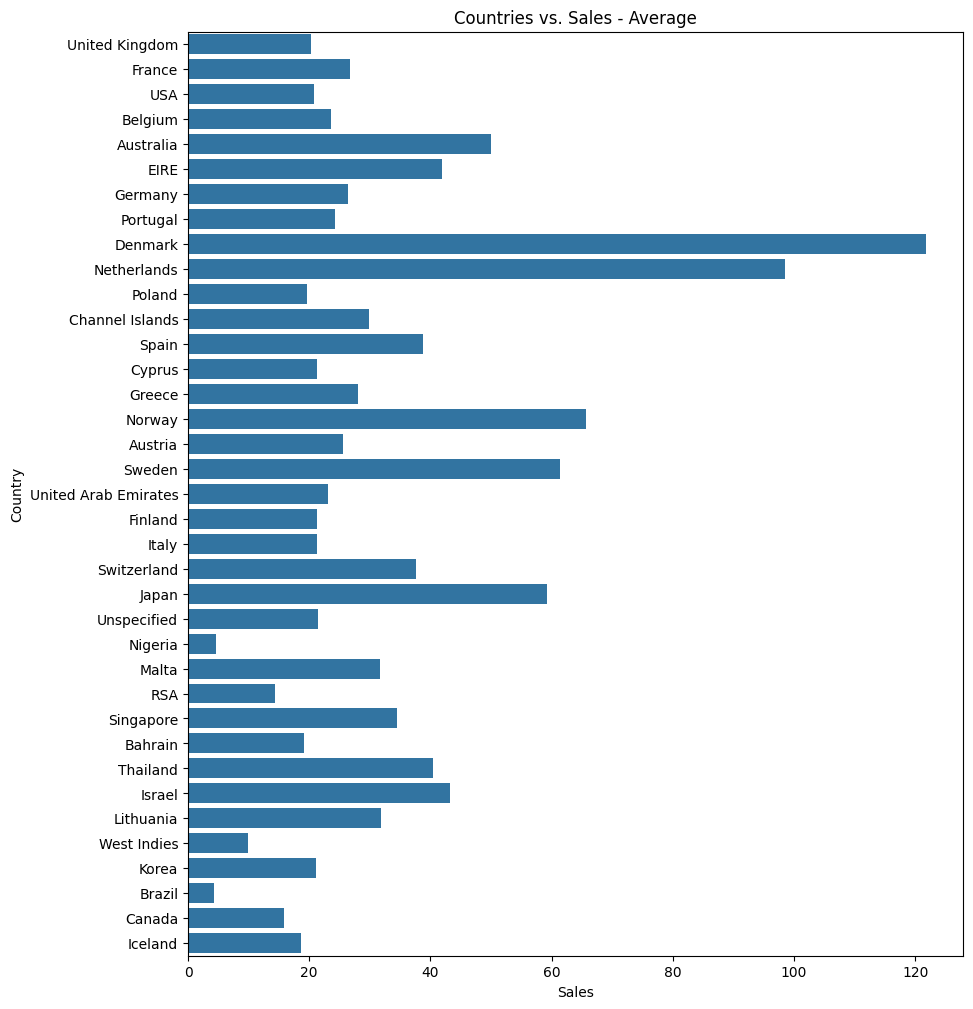

In [29]:
plt.figure(figsize=(10,12))
sn.barplot(
    x="Sales", 
    y="Country", 
    data=Online_retail, 
    estimator='mean', 
    errorbar=None
)
plt.title('Countries vs. Sales - Average')

## CustomerID vs. Sales Graph

Just as it is interesting to know the countries with a higher cumulative sales value, it can also be very useful to perform this same procedure for customers. This way, it would be possible to know, for example, who are the most important customers or even (with an additional process) who are those with greater purchasing power, etc.

Since the unique values of CustomerID are greater than those of Country, the graph is more complicated to observe and distinguish each customer code individually, but it is possible to appreciate the variation in sales values.

<Axes: xlabel='Customer ID', ylabel='Sales'>

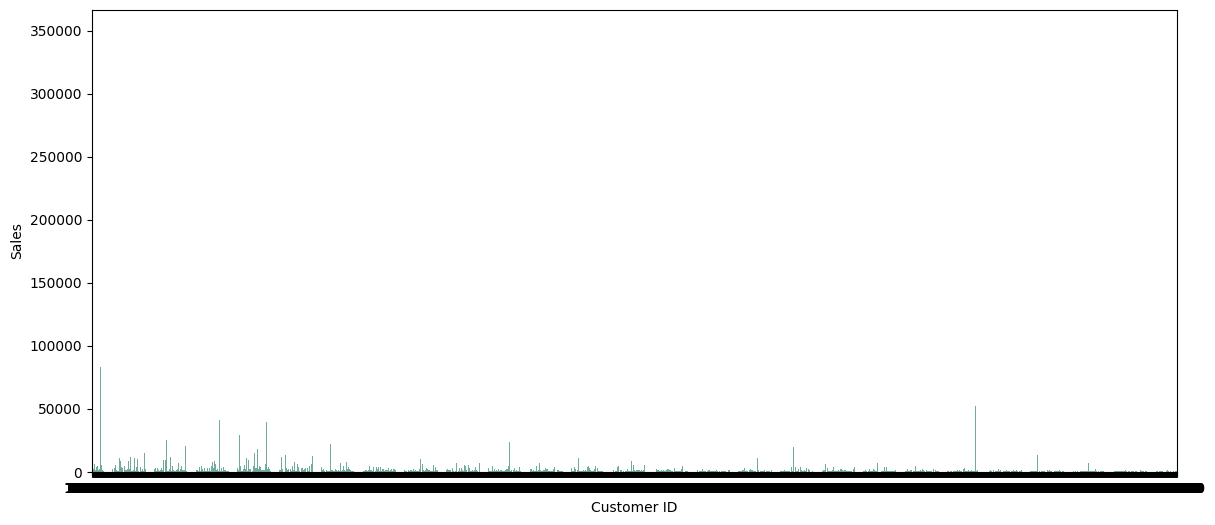

In [30]:
# Set the figure size
plt.figure(figsize=(14, 6))

sn.barplot(
    x="Customer ID", 
    y="Sales", 
    data=Online_retail, 
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2'
)

Now, for both visualization purposes and to obtain relevant information, we will proceed to get a list of the 5 customers with the highest cumulative sales value.

In [31]:
# Group customers by sales value and get the cumulative total.
Customers_Sales = Online_retail.groupby('Customer ID')['Sales'].sum().reset_index()

In [32]:
# Sort the data in descending order
Customers_Sales.sort_values(by = 'Sales', ascending=False, inplace=True)

In [33]:
Customers_Sales[0:5]

,Customer ID,Sales
4185,18102.0,349164.35
1638,14646.0,248396.50
1270,14156.0,196549.74
1842,14911.0,152121.22
939,13694.0,131443.19


Finally, the graph is made, which can now be visualized more clearly.

Text(0.5, 1.0, 'Top 5 customers with the highest cumulative sales value')

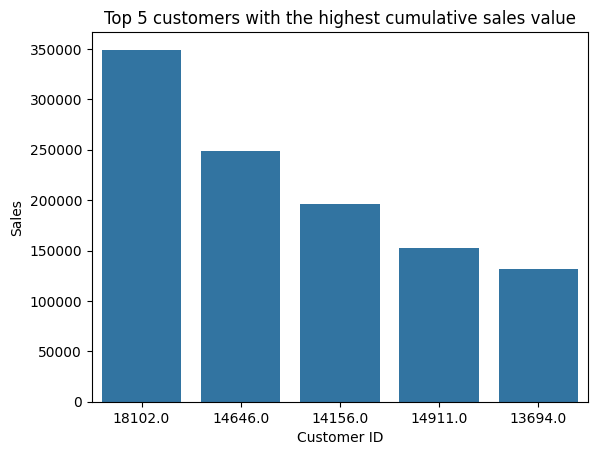

In [34]:
sn.barplot(
    x='Customer ID',
    y = 'Sales',
    data = Customers_Sales[0:5], 
    estimator=sum, 
    errorbar=None, 
)
plt.title('Top 5 customers with the highest cumulative sales value')

## Sales vs. Date Graph

With this analysis, the objective is to know and visualize at what times of the year a higher sales value is obtained, which could allow for the use of different strategies for when times of low sales approach, as well as for when the dates with the highest sales arrive.

In [35]:
# Convert the date column to a datetime format.
Online_retail['InvoiceDate'] = pd.to_datetime(Online_retail['InvoiceDate'], format='%Y-%m-%d')

In [36]:
Online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400934 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    400934 non-null  object        
 1   Quantity     400934 non-null  int64         
 2   InvoiceDate  400934 non-null  datetime64[ns]
 3   Price        400934 non-null  float64       
 4   Customer ID  400934 non-null  object        
 5   Country      400934 non-null  object        
 6   Sales        400934 non-null  float64       
 7   Sales_SC     400934 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 27.5+ MB


In this case, the analysis is no longer performed using the cumulative sales value by StockCode because, being cumulative, it increases over time, which would not allow for a specific observation of the sales value at certain times of the year. Therefore, the 'Sales' variable will be used.

Thus, when visualizing the graph, it can be observed that the period with the highest sales value is approximately between September and December, which may be consistent because, as it is the end of the year, festivities like Christmas are approaching.

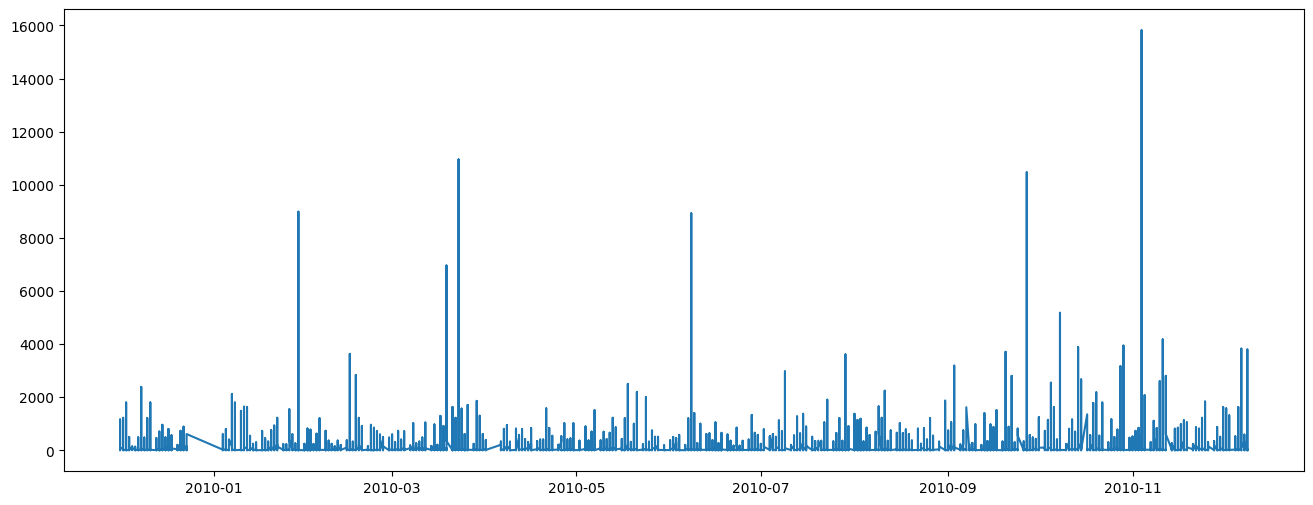

In [37]:
plt.figure(figsize=(16, 6))
plt.plot(Online_retail['InvoiceDate'].dt.date, Online_retail['Sales'])

In [38]:
fecha_mas_ventas = Online_retail.groupby(Online_retail['InvoiceDate'].dt.date)['Sales'].sum().reset_index()

In [39]:
fecha_mas_ventas.sort_values(by = 'Sales', ascending=False, inplace=True)

In [40]:
fecha_mas_ventas[0:5]

,InvoiceDate,Sales
243,2010-09-27,115172.24
258,2010-10-14,86945.13
276,2010-11-04,83876.12
281,2010-11-10,73575.93
24,2010-01-07,72989.38


Text(0.5, 1.0, 'Top 5 dates with the highest sales value')

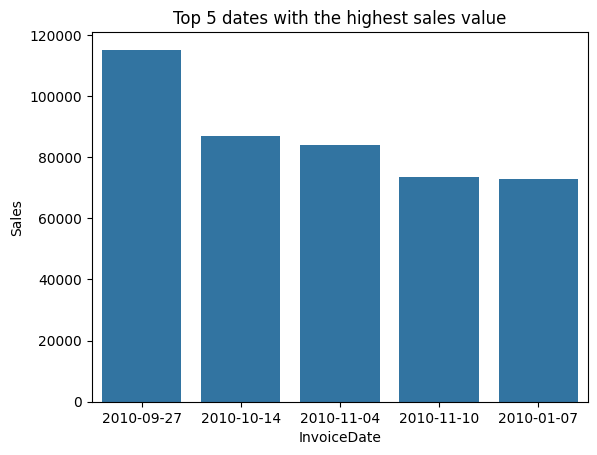

In [41]:
sn.barplot(
    x = 'InvoiceDate',
    y = 'Sales',
    data=fecha_mas_ventas[0:5], 
    estimator=sum, 
    errorbar=None, 
)
plt.title('Top 5 dates with the highest sales value')

The previous graph allows us to see the specific days of the year where more was sold, but it could also be more useful to know the months of the year where there is a higher sales value, so the same procedure is performed to observe the year and month where a higher sales value occurs.

In [42]:
fecha_mas_ventas_x_mes = Online_retail.groupby(Online_retail['InvoiceDate'].dt.to_period('M'))['Sales'].sum().reset_index()

In [43]:
fecha_mas_ventas_x_mes.sort_values(by = 'Sales', ascending=False, inplace = True)

Text(0.5, 1.0, 'Top 5 months with the highest sales value')

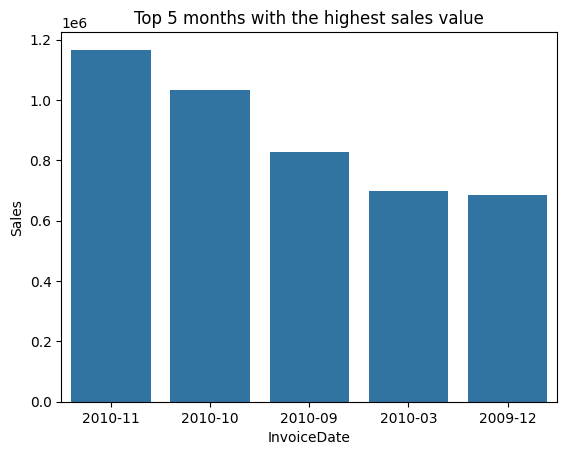

In [44]:
sn.barplot(
    x = 'InvoiceDate',
    y = 'Sales',
    data=fecha_mas_ventas_x_mes[0:5], 
    estimator=sum, 
    errorbar=None, 
)
plt.title('Top 5 months with the highest sales value')

## Quantity vs. StockCode Graph

This seeks to find out which products sell the most and, furthermore, to do so for each month. That is, the objective is to obtain a graph that, on the y-axis, shows the quantity sold (accumulated by StockCode) and on the x-axis, shows the 12 (for each month of the year) best-selling products.

In [45]:
# Get the cumulative quantity of sales by stock code.
Quantity_SC = Online_retail.groupby('StockCode')['Quantity'].sum().reset_index()

Text(0.5, 1.0, 'Cumulative sales quantity by StockCode')

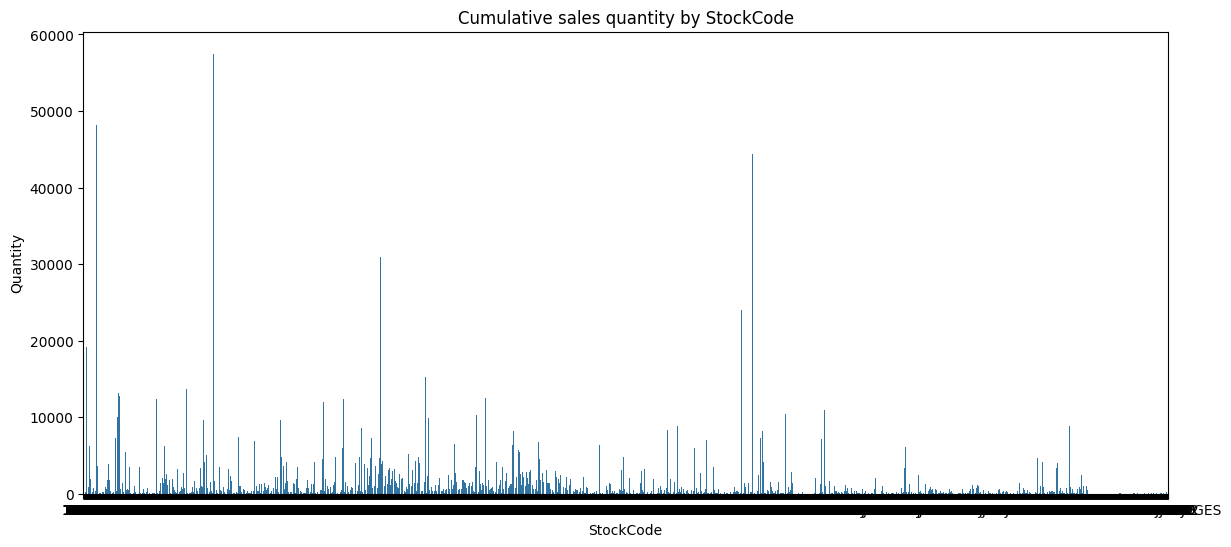

In [46]:
plt.figure(figsize=(14,6))
sn.barplot(
    x = 'StockCode',
    y = 'Quantity',
    data=Quantity_SC, 
    estimator=sum, 
    errorbar=None, 
)
plt.title('Cumulative sales quantity by StockCode')

Once these values are obtained, they could be organized in descending order to get the 5 best-selling products. However, in this case, it is required to group them by month of the year, so a grouping by date is performed.

In [47]:
# A grouping is made between the StockCode, the months of the year, and the corresponding quantity.
fecha_mas_cantidad = Online_retail.groupby([Online_retail['InvoiceDate'].dt.month, Online_retail['StockCode']])['Quantity'].sum().reset_index()

In [48]:
# Get the indices corresponding to the maximum value of the Quantity column for each unique value of InvoiceDate (each month)
most_sales_idx = fecha_mas_cantidad.groupby('InvoiceDate')['Quantity'].idxmax()

In [49]:
# Get the StockCode corresponding to the highest sales quantity for each month.
most_sales = fecha_mas_cantidad.loc[most_sales_idx, ['InvoiceDate', 'StockCode', 'Quantity']]

In [50]:
most_sales

,InvoiceDate,StockCode,Quantity
243,1,20993,9489
3616,2,37410,19248
5048,3,21091,13099
7758,4,21212,5257
10569,5,21982,5569
13678,6,84077,5340
14960,7,21212,4390
17289,8,21088,7131
19525,9,17003,13853
22048,10,17003,6752


In [51]:
# Create a column to associate each StockCode with the month of the year and graph
most_sales['Mes - StockCode'] = most_sales['InvoiceDate'].astype(str) + ' - ' + most_sales['StockCode'].astype(str)

This graph could be read as: "In month *x*, the best-selling product is *y*"

Text(0.5, 1.0, 'Best-selling product for each month of the year')

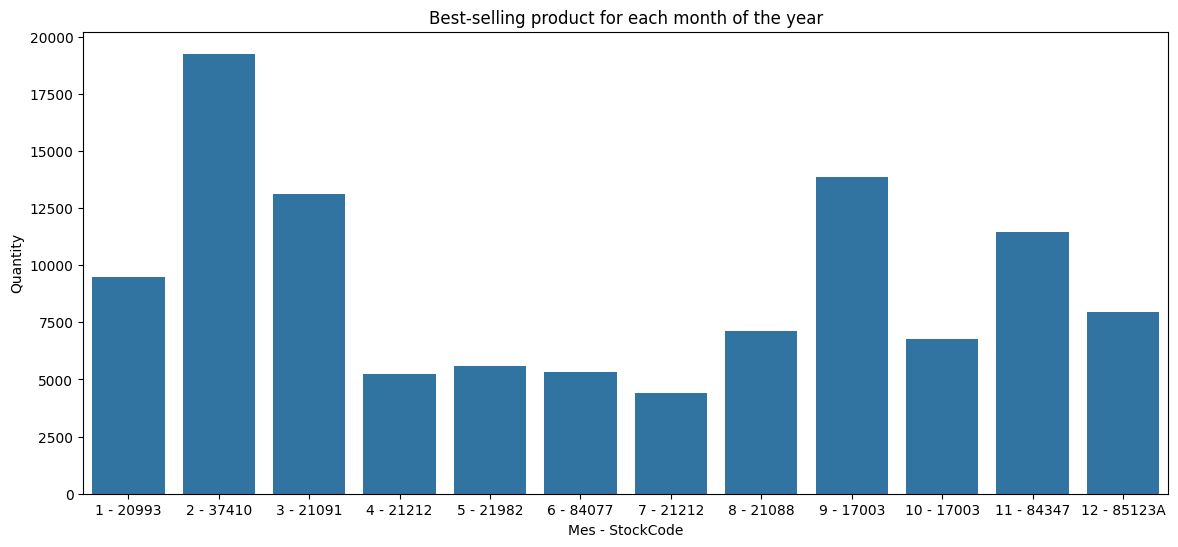

In [52]:
plt.figure(figsize=(14,6))
sn.barplot(
    x = 'Mes - StockCode',
    y = 'Quantity',
    data = most_sales,
    estimator=sum, 
    errorbar=None, 
)
plt.title('Best-selling product for each month of the year')